In [1]:
import PIL
from os import listdir
from PIL import Image

import numpy as np
import cv2

import sys
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

In [2]:
#Image-size
size = 150
train_data = 'images/train/'
test_data = 'images/test/'

In [3]:
#Load the images from the folder
def load_image(path): 
    X = []
    Y = []
    for filename in listdir(path):
        # load image
        image = cv2.imread(path + filename)          
        img_resize = cv2.resize(image, (size, size))    
        X.append(np.asarray(img_resize)) 
        
        if filename.endswith(".jpg"):
            Y.append(filename.split("_")[0])               
        
    return X, Y

In [4]:
#Process the data before traning
def preprocess(x_train, y_train, x_test, y_test):
    #x_train = np.reshape(x_train, (x_train.shape[0], size, size, 3))
    #x_test = np.reshape(x_test, (x_test.shape[0], size, size, 3))
    x_train = x_train / 255
    x_test = x_test / 255  
    
    encoder = LabelEncoder()
    y_train = encoder.fit_transform(y_train)
    y_train = tf.keras.utils.to_categorical(y_train, 4)
    
    y_test = encoder.fit_transform(y_test)
    y_test = tf.keras.utils.to_categorical(y_test, 4)
    return (x_train, y_train, x_test, y_test)

In [5]:
#Build the model    
model = tf.keras.Sequential()

model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=(3, 3), 
    padding = 'same', activation='relu', input_shape=(size, size, 3)))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))


model.add(tf.keras.layers.Conv2D(64, (3, 3), 
    padding = 'same', activation='relu'))        
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))


model.add(tf.keras.layers.Conv2D(128, (3, 3), 
    padding = 'same', activation='relu'))        
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))  

model.add(tf.keras.layers.Dropout(0.5))

model.add(tf.keras.layers.Flatten())    
model.add(tf.keras.layers.Dense(256, activation='relu'))
model.add(tf.keras.layers.Dropout(0.25))
model.add(tf.keras.layers.Dense(256, activation='relu')) 
model.add(tf.keras.layers.Dropout(0.25))
model.add(tf.keras.layers.Dense(256, activation='relu'))
model.add(tf.keras.layers.Dropout(0.25))
model.add(tf.keras.layers.Dense(4, activation='softmax'))

model.compile(loss='categorical_crossentropy',
          optimizer='adam',
          metrics=['accuracy'])
model.summary()    
    

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 150, 150, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 75, 75, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 75, 75, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 37, 37, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 37, 37, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 18, 18, 128)       0         
_________________________________________________________________
dropout (Dropout)            (None, 18, 18, 128)       0

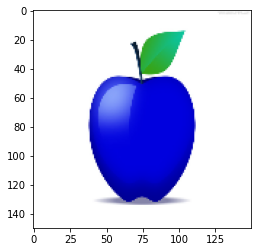

In [7]:
#Train the data
x_train, y_train = load_image(train_data)
x_test, y_test = load_image(test_data)

plt.imshow(x_train[9])

In [8]:
#Process the data before training
x_train = np.asarray(x_train)
y_train = np.asarray(y_train)
x_test = np.asarray(x_test)
y_test = np.asarray(y_test)

(x_train, y_train, x_test, y_test) = preprocess(x_train, y_train, x_test, y_test)

#Train the model
history = model.fit(x_train, y_train, 
        batch_size=32, epochs=15, verbose=1,
        validation_data=(x_test, y_test))

#Check the score
score = model.evaluate(x_test, y_test)
print("score =", score)   

Epoch 1/15
8/8 [==============================] - 6s 99ms/step - loss: 1.4808 - accuracy: 0.3167 - val_loss: 1.2882 - val_accuracy: 0.2833
Epoch 2/15
8/8 [==============================] - 0s 21ms/step - loss: 1.2895 - accuracy: 0.3958 - val_loss: 1.1401 - val_accuracy: 0.5500
Epoch 3/15
8/8 [==============================] - 0s 21ms/step - loss: 1.0835 - accuracy: 0.5917 - val_loss: 0.8436 - val_accuracy: 0.6167
Epoch 4/15
8/8 [==============================] - 0s 21ms/step - loss: 0.7668 - accuracy: 0.6792 - val_loss: 0.6533 - val_accuracy: 0.8333
Epoch 5/15
8/8 [==============================] - 0s 21ms/step - loss: 0.5621 - accuracy: 0.8208 - val_loss: 0.4895 - val_accuracy: 0.8500
Epoch 6/15
8/8 [==============================] - 0s 21ms/step - loss: 0.4145 - accuracy: 0.8375 - val_loss: 0.4644 - val_accuracy: 0.8667
Epoch 7/15
8/8 [==============================] - 0s 22ms/step - loss: 0.3017 - accuracy: 0.8917 - val_loss: 0.4336 - val_accuracy: 0.9000
Epoch 8/15
8/8 [===========

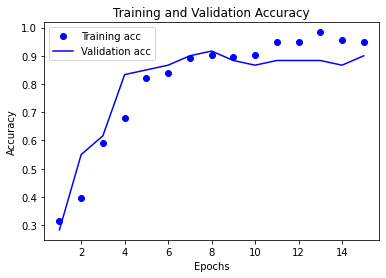

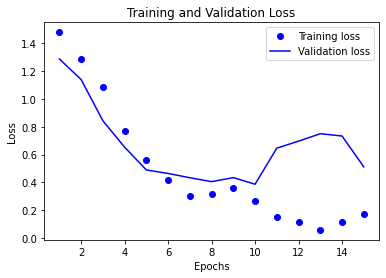

In [9]:
#Check the data accuracy
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and Validation Accuracy')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

plt.show()

In [10]:
#Checking for individual photo

x_test0 = np.reshape(x_test[5], (1, size, size, 3))

y_test0 = np.reshape(y_test[5], (1, 4))

score1 = model.evaluate(x_test0, y_test0)
print("score =", score1)  

1/1 [==============================] - 0s 93ms/step - loss: 3.5763e-07 - accuracy: 1.0000
score = [3.576278118089249e-07, 1.0]
